### Transfer Learning

In [3]:
# VGGNET, ResNet50, Inceptionv3, xception, MobileNetv2  

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D, Dropout, Reshape, BatchNormalization

In [6]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
data_dir = 'Skin_Data'
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_datagenerator = train_datagen.flow_from_directory(directory=data_dir, target_size=(img_width, img_height), 
                                   class_mode='binary', subset='training')

test_datagenerator = train_datagen.flow_from_directory(directory=data_dir, target_size=(img_width, img_height), 
                                   class_mode='binary', subset='validation')

base_model = VGG16(weights='imagenet', input_shape=(img_width, img_height, 3), include_top=False)
model = Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_datagenerator, epochs=10, validation_data=test_datagenerator)

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Epoch 1/10


C:\Users\metehan\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.6069 - loss: 4.2409 - val_accuracy: 0.6786 - val_loss: 0.6053
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.7783 - loss: 0.4111 - val_accuracy: 0.8036 - val_loss: 0.3803
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.8824 - loss: 0.2537 - val_accuracy: 0.7679 - val_loss: 0.4868
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.9110 - loss: 0.2090 - val_accuracy: 0.8571 - val_loss: 0.3146
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 6s/step - accuracy: 0.9651 - loss: 0.1188 - val_accuracy: 0.8571 - val_loss: 0.3777
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 6s/step - accuracy: 0.9856 - loss: 0.0692 - val_accuracy: 0.8393 - val_loss: 0.3416
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.9801 - loss: 0.0684 - val_accuracy: 0.8214 - val_loss: 0.3120
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 6s/step - accuracy: 1.0000 - loss: 0.0463 - val_accuracy: 0.8036 - val_loss: 0.3168
Epoch 9/10
8/8 ━━━━

In [10]:
model.summary() #model özeti

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,791,173 (350.16 MB)

 Trainable params: 25,692,161 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,384,324 (196.02 MB)

In [11]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from IPython.display import Image

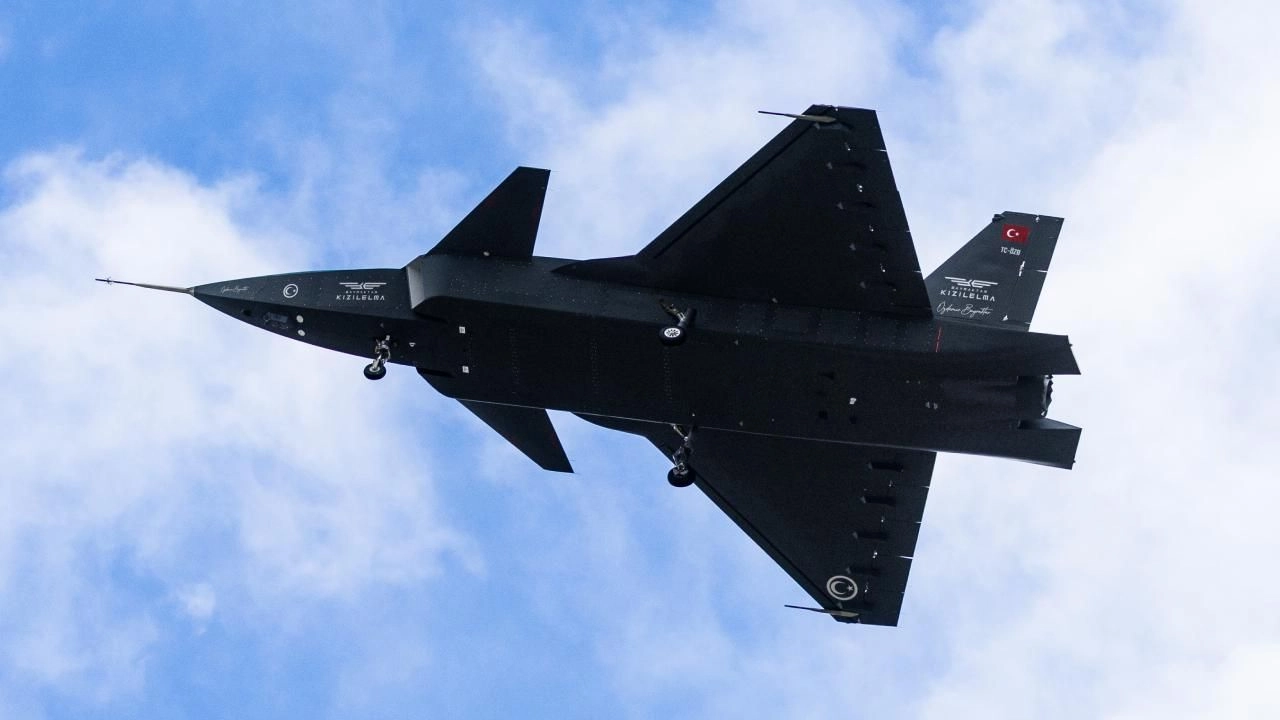

In [12]:
Image('SavasUcagi.png')

In [17]:
import numpy as np

In [19]:
img = image.load_img('SavasUcagi.png', target_size=(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [21]:
model = ResNet50(weights='imagenet')

In [22]:
pred = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [23]:
decode_predictions(pred, top=1)[0]

[('n04552348', 'warplane', 0.90099)]